## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("loan.xlsx")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

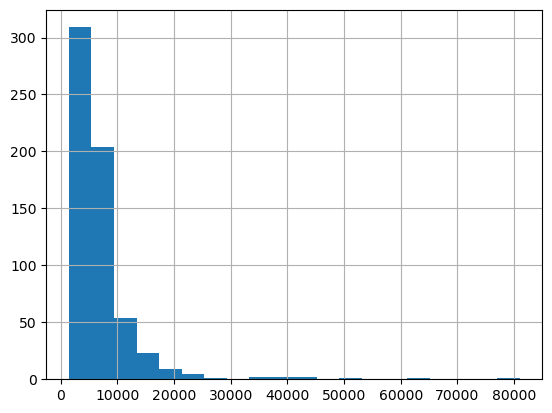

In [6]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["TotalIncome"].hist(bins = 20)

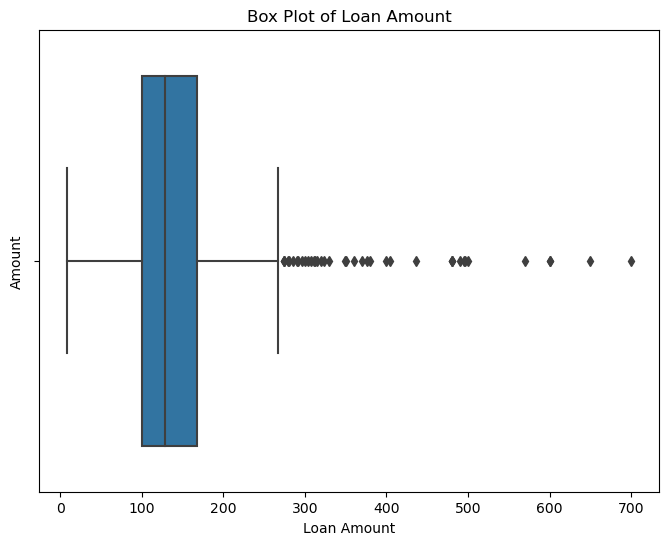

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["LoanAmount"])

plt.xlabel("Loan Amount")
plt.ylabel("Amount")
plt.title("Box Plot of Loan Amount")

# Show plot
plt.show()


In [8]:
# Calculate the first quartile (Q1)
Q1 = df["LoanAmount"].quantile(0.25)

Q3 = df["LoanAmount"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["LoanAmount"] < lower_bound) | (df["LoanAmount"] > upper_bound)]

num_outliers = len(outliers)

print("Number of outliers:", num_outliers)


Number of outliers: 39


In [9]:
df.shape

(614, 14)

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000


In [11]:
import pandas as pd

# Assuming df is your DataFrame containing the column "LoanAmount"
# Replace 'df' with your actual DataFrame name if different

# Calculate the first quartile (Q1)
Q1 = df["LoanAmount"].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df["LoanAmount"].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median of non-outlier data
median_loan_amount = df[(df["LoanAmount"] >= lower_bound) & (df["LoanAmount"] <= upper_bound)]["LoanAmount"].median()

# Replace outliers
df.loc[df["LoanAmount"] < lower_bound, "LoanAmount"] = median_loan_amount
df.loc[df["LoanAmount"] > upper_bound, "LoanAmount"] = median_loan_amount

# Verify if any outliers remain after replacement
outliers_after_replacement = df[(df["LoanAmount"] < lower_bound) | (df["LoanAmount"] > upper_bound)]

# Display the number of outliers after replacement
print("Number of outliers after replacement:", len(outliers_after_replacement))


Number of outliers after replacement: 0


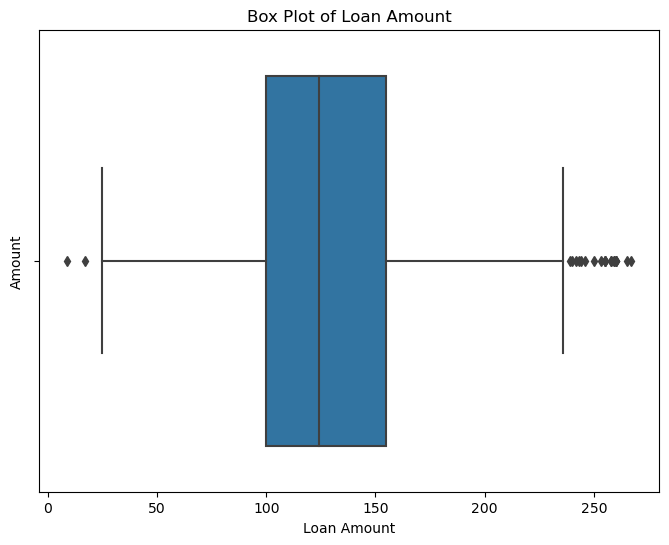

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["LoanAmount"])

plt.xlabel("Loan Amount")
plt.ylabel("Amount")
plt.title("Box Plot of Loan Amount")

# Show plot
plt.show()

In [13]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace = True)
df["Married"].fillna(df["Married"].mode()[0], inplace = True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace = True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace = True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace = True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace = True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace = True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.670608,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


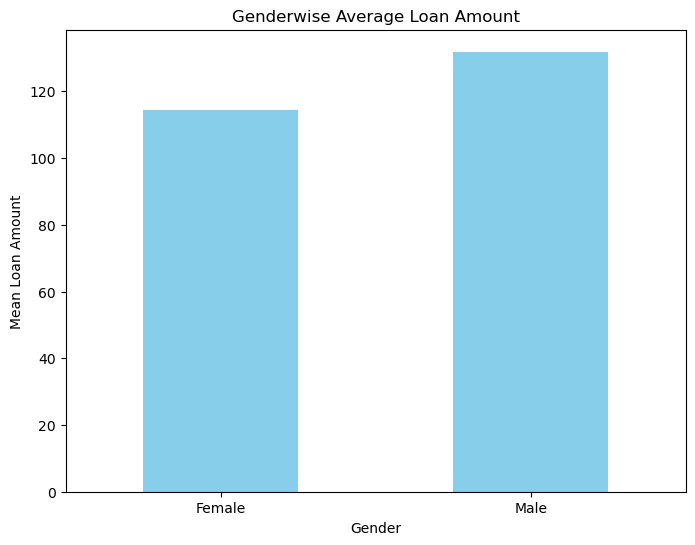

In [91]:
gender_loan_amount = df.groupby('Gender')['LoanAmount'].mean()

plt.figure(figsize=(8, 6))
gender_loan_amount.plot(kind='bar', color='skyblue')
plt.title('Genderwise Average Loan Amount')
plt.xlabel('Gender')
plt.ylabel('Mean Loan Amount')
plt.xticks(rotation=0)
plt.show()

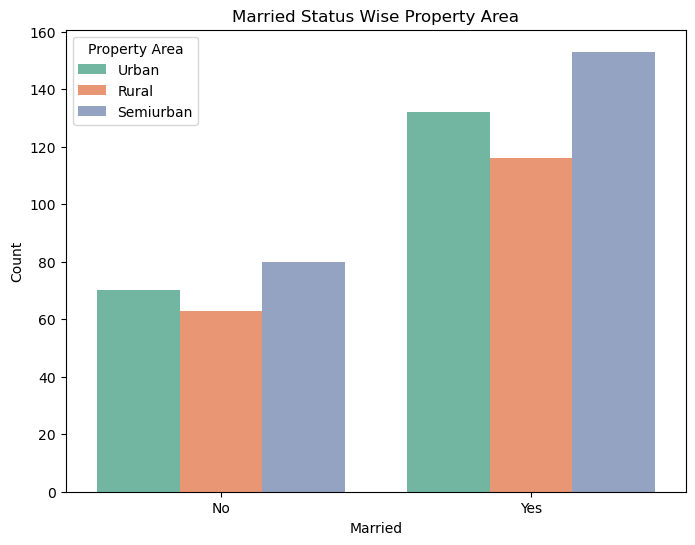

In [92]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', hue='Property_Area', data=df, palette='Set2')
plt.title('Married Status Wise Property Area')
plt.xlabel('Married')
plt.ylabel('Count')
plt.legend(title='Property Area')
plt.show()

In [16]:
df['Loan_Status'] = loan_status

print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  128.670608           

In [26]:
df1 = df.copy()
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.670608,360.0,1.0,Urban,5849.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,6091.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,3000.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4941.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,6000.0,Y


In [31]:
df1.pop("Loan_ID")
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.670608,360.0,1.0,Urban,5849.0,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,6091.0,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,3000.0,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4941.0,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,6000.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,2900.0,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,4106.0,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,8312.0,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,7583.0,Y


In [32]:
df1.Loan_Amount_Term.unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [33]:
from sklearn.preprocessing import StandardScaler

# Extracting the numeric columns
numeric_columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "TotalIncome"]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df1[numeric_columns] = scaler.fit_transform(df1[numeric_columns])

# Print the updated DataFrame
print(df1)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No         0.072991   
1      Male     Yes          1      Graduate            No        -0.134412   
2      Male     Yes          0      Graduate           Yes        -0.393747   
3      Male     Yes          0  Not Graduate            No        -0.462062   
4      Male      No          0      Graduate            No         0.097728   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No        -0.410130   
610    Male     Yes         3+      Graduate            No        -0.212557   
611    Male     Yes          1      Graduate            No         0.437174   
612    Male     Yes          2      Graduate            No         0.357064   
613  Female      No          0      Graduate           Yes        -0.134412   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [34]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# List of categorical columns
categorical_columns = ["Gender", "Married", "Dependents", "Education", "Self_Employed", 
                       "Loan_Amount_Term", "Credit_History", "Property_Area", "Loan_Status"]

# Initialize LabelEncoder for binary columns
label_encoder = LabelEncoder()

# Encode binary columns
for column in ["Married", "Education", "Self_Employed", "Credit_History", "Loan_Status"]:
    df1[column] = label_encoder.fit_transform(df1[column])

# Initialize OneHotEncoder for columns with multiple categories
onehot_encoder = OneHotEncoder(sparse=False, drop="first")

# Encode columns with multiple categories
df1 = pd.get_dummies(df1, columns=[col for col in categorical_columns if col not in 
                                           ["Married", "Education", "Self_Employed", "Credit_History", "Loan_Status"]],
                              drop_first=True)

# Print the updated DataFrame
print(df1)


     Married  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  \
0          0          0              0         0.072991          -0.554487   
1          1          0              0        -0.134412          -0.038732   
2          1          0              1        -0.393747          -0.554487   
3          1          1              0        -0.462062           0.251980   
4          0          0              0         0.097728          -0.554487   
..       ...        ...            ...              ...                ...   
609        0          0              0        -0.410130          -0.554487   
610        1          0              0        -0.212557          -0.554487   
611        1          0              0         0.437174          -0.472404   
612        1          0              0         0.357064          -0.554487   
613        0          0              1        -0.134412          -0.554487   

     LoanAmount  Credit_History  TotalIncome  Loan_Status  Gend

In [35]:
df1.head()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,TotalIncome,Loan_Status,Gender_Male,Dependents_1,Dependents_2,Dependents_3+,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,0.072991,-0.554487,0.000000,1,-0.182184,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,1,0,0,-0.134412,-0.038732,-0.014752,1,-0.144684,0,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False
2,1,0,1,-0.393747,-0.554487,-1.378605,1,-0.623656,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,1,1,0,-0.462062,0.251980,-0.190733,1,-0.322885,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,0,0,0,0.097728,-0.554487,0.271217,1,-0.158785,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True


In [17]:
print("Per of missing gender is %2f%%" %((df["Gender"].isnull().sum()/df.shape[0])*100))

Per of missing gender is 0.000000%


Number of people who take loan as group by gender : 
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

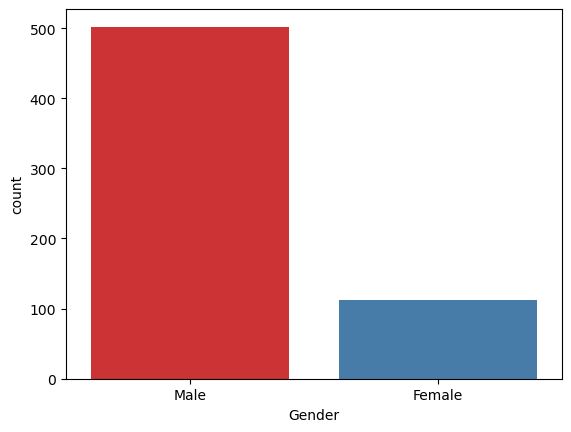

In [18]:
print("Number of people who take loan as group by gender : ")
print(df["Gender"].value_counts())
sns.countplot(x = "Gender", data = df, palette = "Set1")

Number of people who take loan as group by marital status : 
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

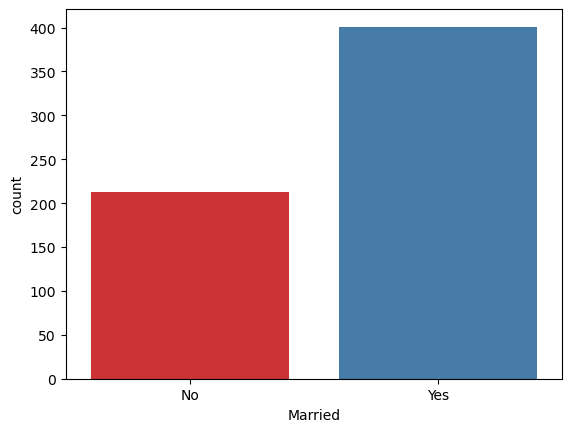

In [19]:
print("Number of people who take loan as group by marital status : ")
print(df["Married"].value_counts())
sns.countplot(x = "Married", data = df, palette = "Set1")

Number of people who take loan as group by dependents : 
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

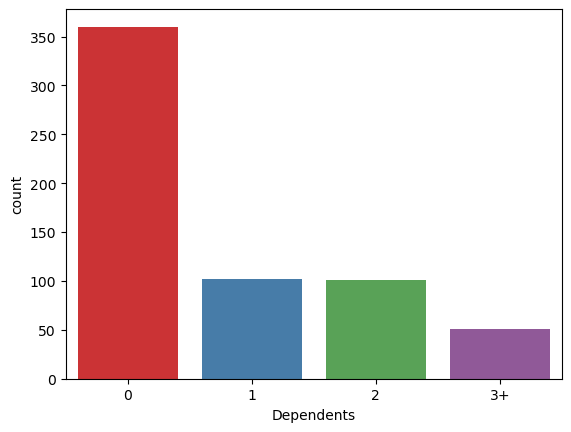

In [20]:
print("Number of people who take loan as group by dependents : ")
print(df["Dependents"].value_counts())
sns.countplot(x = "Dependents", data = df, palette = "Set1")

Number of people who take loan as group by self employed : 
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

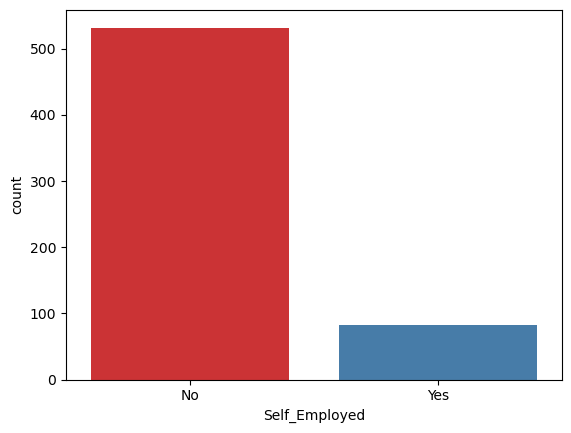

In [21]:
print("Number of people who take loan as group by self employed : ")
print(df["Self_Employed"].value_counts())
sns.countplot(x = "Self_Employed", data = df, palette = "Set1")

Number of people who take loan as group by loan amount : 
LoanAmount
124.000000    44
128.670608    22
120.000000    20
110.000000    17
100.000000    15
              ..
207.000000     1
42.000000      1
72.000000      1
240.000000     1
253.000000     1
Name: count, Length: 170, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

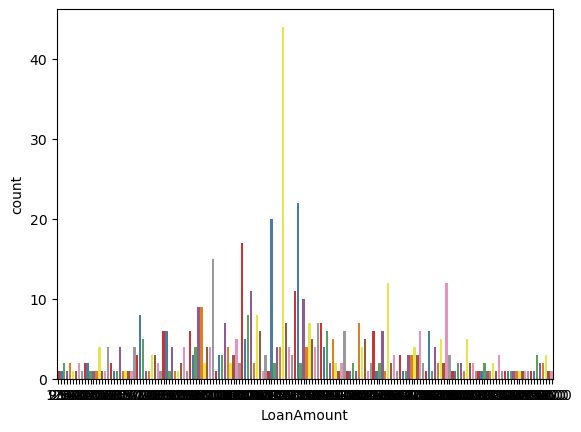

In [22]:
print("Number of people who take loan as group by loan amount : ")
print(df["LoanAmount"].value_counts())
sns.countplot(x = "LoanAmount", data = df, palette = "Set1")

Number of people who take loan as group by credit history : 
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

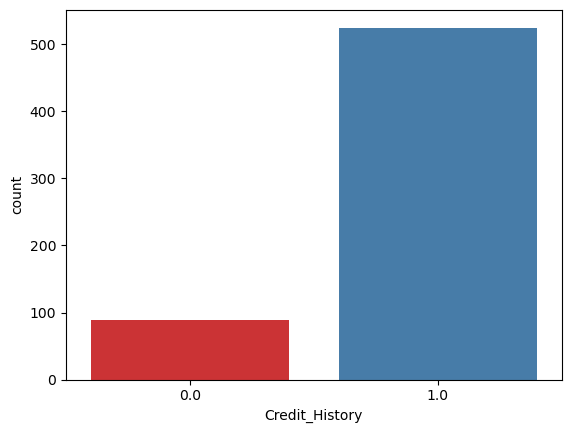

In [23]:
print("Number of people who take loan as group by credit history : ")
print(df["Credit_History"].value_counts())
sns.countplot(x = "Credit_History", data = df, palette = "Set1")

In [37]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [38]:
X

array([[0, 0, 0, ..., True, False, False],
       [1, 0, 0, ..., True, False, False],
       [1, 0, 1, ..., True, False, False],
       ...,
       [1, 0, 0, ..., True, False, False],
       [1, 0, 0, ..., True, False, False],
       [0, 0, 1, ..., True, False, True]], dtype=object)

In [39]:
y

array([ True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False, False,  True,  True,  True, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False,  True, False,  True, False,  True,  True,  True, False,
        True, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [41]:
X_train

array([[1, 0, 0, ..., True, False, True],
       [0, 0, 0, ..., True, False, True],
       [1, 0, 0, ..., True, False, False],
       ...,
       [1, 0, 0, ..., True, False, True],
       [1, 1, 0, ..., True, False, False],
       [1, 0, 0, ..., True, False, True]], dtype=object)

In [42]:
y_train

array([False, False, False,  True, False, False,  True, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True,  True,
       False, False,  True,  True,  True, False, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [43]:
X_test

array([[0, 0, 1, ..., True, False, True],
       [0, 0, 0, ..., True, False, True],
       [1, 0, 0, ..., True, False, False],
       ...,
       [1, 0, 0, ..., True, False, True],
       [1, 1, 0, ..., False, False, False],
       [1, 0, 0, ..., True, False, False]], dtype=object)

In [44]:
y_test

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True, False,  True,  True,  True, False,  True,  True, False,
       False,  True, False, False, False,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
        True, False, False, False,  True,  True, False, False,  True,
       False, False, False, False,  True,  True])

## Applying Machine Learning Classification Algorithms

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [ True  True]
 [False  True]
 [False False]
 [ True False]
 [ True False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True  True]
 [False False]
 [False False]
 [ True  True]
 [False  True]
 [ True  True]
 [False False]
 [ True False]
 [ True False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [False  True]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [ True False]
 [False False]
 [ True  True]
 [False False]
 [ True False]
 [ True False]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [ True False]
 [False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [ True  True]
 [False Fa

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy Score : {classifier.score(X_test, y_test)*100} %")

[[64 20]
 [ 7 32]]
Accuracy Score : 78.04878048780488 %


## K Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [ True  True]
 [False  True]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [ True  True]
 [False False]
 [False False]
 [ True  True]
 [False  True]
 [ True  True]
 [False False]
 [ True False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [ True  True]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False  True]
 [False False]
 [False False]
 [ True False]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [ True False]
 [False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [ True  True]
 [False Fa

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy Score : {classifier.score(X_test, y_test)*100} %")

[[70 14]
 [13 26]]
Accuracy Score : 78.04878048780488 %


## Support Vector Machine (SVM)

In [58]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [ True  True]
 [ True  True]
 [False False]
 [False False]
 [ True False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True  True]
 [False False]
 [False False]
 [ True  True]
 [False  True]
 [ True  True]
 [False False]
 [ True False]
 [ True False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True  True]
 [ True False]
 [ True  True]
 [False  True]
 [False False]
 [ True False]
 [False False]
 [False False]
 [ True False]
 [ True False]
 [False False]
 [ True  True]
 [False False]
 [ True False]
 [ True False]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [ True False]
 [False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [ True  True]
 [False Fa

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy Score : {classifier.score(X_test, y_test)*100} %")

[[56 28]
 [ 6 33]]
Accuracy Score : 72.35772357723577 %


## Kernal SVM

In [62]:
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [63]:
y_pred = classifier.predict(X_test)

In [64]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [False  True]
 [False  True]
 [False False]
 [ True False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True  True]
 [False False]
 [False False]
 [ True  True]
 [False  True]
 [False  True]
 [False False]
 [ True False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [False  True]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False  True]
 [False False]
 [False False]
 [ True False]
 [False False]
 [ True  True]
 [False False]
 [False  True]
 [ True False]
 [False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [False  True]
 [False Fa

In [65]:
print(f"Accuracy Score : {classifier.score(X_test, y_test)}")

Accuracy Score : 0.7479674796747967


In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy Score : {classifier.score(X_test, y_test)*100} %")

[[68 16]
 [15 24]]
Accuracy Score : 74.79674796747967 %


## Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [68]:
y_pred = classifier.predict(X_test)

In [69]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [ True  True]
 [ True  True]
 [False False]
 [ True False]
 [ True False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True  True]
 [False False]
 [False False]
 [ True  True]
 [ True  True]
 [ True  True]
 [False False]
 [ True False]
 [ True False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [ True  True]
 [ True False]
 [False  True]
 [ True  True]
 [False False]
 [ True False]
 [False False]
 [False False]
 [ True False]
 [ True False]
 [False False]
 [ True  True]
 [ True False]
 [ True False]
 [ True False]
 [False False]
 [ True  True]
 [ True False]
 [ True  True]
 [ True False]
 [False False]
 [False False]
 [ True  True]
 [ True  True]
 [False False]
 [ True  True]
 [False Fa

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy Score : {classifier.score(X_test, y_test)*100} %")

[[48 36]
 [ 1 38]]
Accuracy Score : 69.91869918699187 %


## Decision Tree Classification

In [71]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False  True]
 [False False]
 [False False]
 [ True  True]
 [False  True]
 [False  True]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [ True  True]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [ True  True]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False  True]
 [False False]
 [ True  True]
 [ True False]
 [False False]
 [False False]
 [False  True]
 [False  True]
 [False False]
 [False  True]
 [False Fa

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy Score : {classifier.score(X_test, y_test)*100} %")

[[71 13]
 [16 23]]
Accuracy Score : 76.42276422764228 %


## Random Forest Classification

In [75]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [76]:
y_pred = classifier.predict(X_test)

In [77]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [ True False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True  True]
 [False False]
 [False False]
 [ True  True]
 [False  True]
 [ True  True]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True  True]
 [False False]
 [ True  True]
 [False  True]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False  True]
 [False False]
 [False False]
 [ True False]
 [False False]
 [ True  True]
 [False False]
 [False  True]
 [ True False]
 [False False]
 [False False]
 [False  True]
 [ True  True]
 [False False]
 [ True  True]
 [False Fa

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy Score : {classifier.score(X_test, y_test)*100} %")

[[71 13]
 [12 27]]
Accuracy Score : 79.67479674796748 %
